In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dados_vendas = {
    'mes': [
      'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
    ],
    'vendas': [
       2000, 2200, 2300, 2500, 2600, 2700,
       2800, 2900, 3000, 3100, 3200, 3300
    ]
}

In [10]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [11]:
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [12]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [13]:
# 1. TRANSFORMAÇÃO DOS MESES PARA NÚMEROS

# Criar dicionário de mapeamento de meses
meses_para_numero = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4,
    'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
    'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

# Adicionar coluna com número do mês
df_vendas['mes_numero'] = df_vendas['mes'].map(meses_para_numero)

# Visualizar resultado
df_vendas

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [14]:
# 2. ANÁLISE EXPLORATÓRIA DOS DADOS

print("=" * 50)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 50)
print(df_vendas[['vendas', 'mes_numero']].describe())
print("\n")

# Informações do dataset
print("=" * 50)
print("INFORMAÇÕES DO DATASET")
print("=" * 50)
df_vendas.info()
print("\n")

# Valores ausentes
print("=" * 50)
print("VALORES AUSENTES")
print("=" * 50)
print(df_vendas.isnull().sum())

ESTATÍSTICAS DESCRITIVAS
            vendas  mes_numero
count    12.000000   12.000000
mean   2716.666667    6.500000
std     410.838020    3.605551
min    2000.000000    1.000000
25%    2450.000000    3.750000
50%    2750.000000    6.500000
75%    3025.000000    9.250000
max    3300.000000   12.000000


INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         12 non-null     object
 1   vendas      12 non-null     int64 
 2   mes_numero  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


VALORES AUSENTES
mes           0
vendas        0
mes_numero    0
dtype: int64


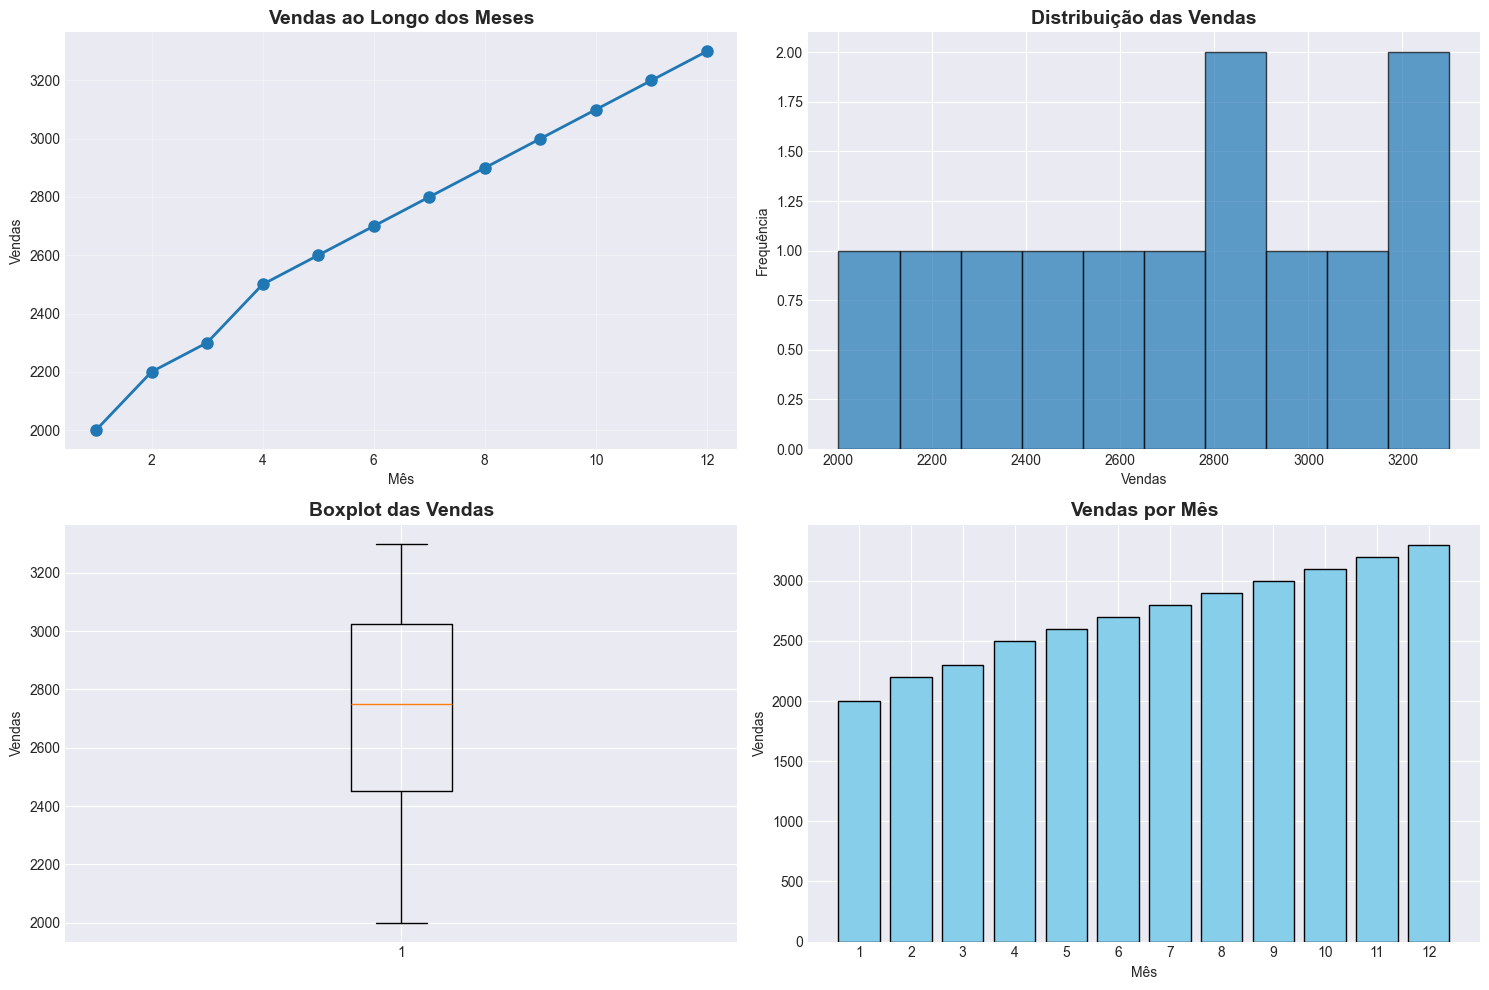

In [15]:
# 3. VISUALIZAÇÕES

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Vendas ao longo do tempo
axes[0, 0].plot(df_vendas['mes_numero'], df_vendas['vendas'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Vendas ao Longo dos Meses', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Mês')
axes[0, 0].set_ylabel('Vendas')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Distribuição das vendas
axes[0, 1].hist(df_vendas['vendas'], bins=10, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribuição das Vendas', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Vendas')
axes[0, 1].set_ylabel('Frequência')

# Gráfico 3: Boxplot
axes[1, 0].boxplot(df_vendas['vendas'], vert=True)
axes[1, 0].set_title('Boxplot das Vendas', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Vendas')

# Gráfico 4: Barras por mês
axes[1, 1].bar(df_vendas['mes_numero'], df_vendas['vendas'], color='skyblue', edgecolor='black')
axes[1, 1].set_title('Vendas por Mês', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mês')
axes[1, 1].set_ylabel('Vendas')
axes[1, 1].set_xticks(df_vendas['mes_numero'])

plt.tight_layout()
plt.show()

In [16]:
# 4. ENGENHARIA DE FEATURES - PARTE 1: TENDÊNCIA TEMPORAL

import numpy as np

# Feature 1: Tendência linear (0 a 11)
df_vendas['tendencia'] = range(len(df_vendas))

# Feature 2: Tendência normalizada (0 a 1)
df_vendas['tendencia_norm'] = df_vendas['tendencia'] / (len(df_vendas) - 1)

# Feature 3: Trimestre
df_vendas['trimestre'] = pd.cut(df_vendas['mes_numero'], 
                                  bins=[0, 3, 6, 9, 12], 
                                  labels=[1, 2, 3, 4])

# Feature 4: Semestre
df_vendas['semestre'] = pd.cut(df_vendas['mes_numero'], 
                                 bins=[0, 6, 12], 
                                 labels=[1, 2])

# Feature 5: Bimestre
df_vendas['bimestre'] = pd.cut(df_vendas['mes_numero'], 
                                 bins=[0, 2, 4, 6, 8, 10, 12], 
                                 labels=[1, 2, 3, 4, 5, 6])

print("Features de Tendência Temporal criadas:")
df_vendas.head()

Features de Tendência Temporal criadas:


,mes,vendas,mes_numero,tendencia,tendencia_norm,trimestre,semestre,bimestre
0,Janeiro,2000,1,0,0.000000,1,1,1
1,Fevereiro,2200,2,1,0.090909,1,1,1
2,Março,2300,3,2,0.181818,1,1,2
3,Abril,2500,4,3,0.272727,2,1,2
4,Maio,2600,5,4,0.363636,2,1,3


In [17]:
# 5. ENGENHARIA DE FEATURES - PARTE 2: SAZONALIDADE (COMPONENTES CÍCLICOS)

# Feature 6: Componente seno (captura padrões cíclicos anuais)
df_vendas['mes_sin'] = np.sin(2 * np.pi * df_vendas['mes_numero'] / 12)

# Feature 7: Componente cosseno (captura padrões cíclicos anuais)
df_vendas['mes_cos'] = np.cos(2 * np.pi * df_vendas['mes_numero'] / 12)

# Feature 8: Identificar estações do ano
def identificar_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verao'  # Verão no Brasil
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df_vendas['estacao'] = df_vendas['mes_numero'].apply(identificar_estacao)

# Feature 9: É fim de ano? (aumenta vendas geralmente)
df_vendas['fim_ano'] = df_vendas['mes_numero'].isin([11, 12]).astype(int)

# Feature 10: É meio do ano? (metade do ano)
df_vendas['meio_ano'] = df_vendas['mes_numero'].isin([6, 7]).astype(int)

print("Features de Sazonalidade criadas:")
df_vendas[['mes', 'mes_sin', 'mes_cos', 'estacao', 'fim_ano', 'meio_ano']].head()

Features de Sazonalidade criadas:


,mes,mes_sin,mes_cos,estacao,fim_ano,meio_ano
0,Janeiro,0.500000,8.660254e-01,Verao,0,0
1,Fevereiro,0.866025,5.000000e-01,Verao,0,0
2,Março,1.000000,6.123234e-17,Outono,0,0
3,Abril,0.866025,-5.000000e-01,Outono,0,0
4,Maio,0.500000,-8.660254e-01,Outono,0,0


In [18]:
# 6. ENGENHARIA DE FEATURES - PARTE 3: FEATURES ESTATÍSTICAS

# Feature 11: Média móvel de 3 meses
df_vendas['media_movel_3'] = df_vendas['vendas'].rolling(window=3, min_periods=1).mean()

# Feature 12: Média móvel de 6 meses  
df_vendas['media_movel_6'] = df_vendas['vendas'].rolling(window=6, min_periods=1).mean()

# Feature 13: Desvio padrão móvel de 3 meses
df_vendas['std_movel_3'] = df_vendas['vendas'].rolling(window=3, min_periods=1).std()

# Feature 14: Diferença em relação ao mês anterior (variação)
df_vendas['diff_mes_anterior'] = df_vendas['vendas'].diff()

# Feature 15: Variação percentual em relação ao mês anterior
df_vendas['var_perc_mes_anterior'] = df_vendas['vendas'].pct_change() * 100

# Feature 16: Crescimento acumulado
df_vendas['crescimento_acum'] = (df_vendas['vendas'] - df_vendas['vendas'].iloc[0]) / df_vendas['vendas'].iloc[0] * 100

# Feature 17: Média acumulada
df_vendas['media_acum'] = df_vendas['vendas'].expanding().mean()

# Feature 18: Desvio da média geral
media_geral = df_vendas['vendas'].mean()
df_vendas['desvio_media_geral'] = df_vendas['vendas'] - media_geral

# Feature 19: Vendas normalizadas (0-1)
df_vendas['vendas_norm'] = (df_vendas['vendas'] - df_vendas['vendas'].min()) / (df_vendas['vendas'].max() - df_vendas['vendas'].min())

# Feature 20: Vendas padronizadas (z-score)
df_vendas['vendas_std'] = (df_vendas['vendas'] - df_vendas['vendas'].mean()) / df_vendas['vendas'].std()

print("Features Estatísticas criadas:")
print(df_vendas[['mes', 'vendas', 'media_movel_3', 'diff_mes_anterior', 'var_perc_mes_anterior']].head(6))

Features Estatísticas criadas:
         mes  vendas  media_movel_3  diff_mes_anterior  var_perc_mes_anterior
0    Janeiro    2000    2000.000000                NaN                    NaN
1  Fevereiro    2200    2100.000000              200.0              10.000000
2      Março    2300    2166.666667              100.0               4.545455
3      Abril    2500    2333.333333              200.0               8.695652
4       Maio    2600    2466.666667              100.0               4.000000
5      Junho    2700    2600.000000              100.0               3.846154


In [19]:
# 7. VISUALIZAR TODAS AS FEATURES CRIADAS

print("=" * 80)
print("DATASET COMPLETO COM TODAS AS FEATURES")
print("=" * 80)
print(f"\nTotal de features criadas: {len(df_vendas.columns)}")
print(f"Linhas: {len(df_vendas)}")
print("\nColunas disponíveis:")
for i, col in enumerate(df_vendas.columns, 1):
    print(f"{i}. {col}")

print("\n" + "=" * 80)
print("VISUALIZAÇÃO DO DATASET")
print("=" * 80)
df_vendas

DATASET COMPLETO COM TODAS AS FEATURES

Total de features criadas: 23
Linhas: 12

Colunas disponíveis:
1. mes
2. vendas
3. mes_numero
4. tendencia
5. tendencia_norm
6. trimestre
7. semestre
8. bimestre
9. mes_sin
10. mes_cos
11. estacao
12. fim_ano
13. meio_ano
14. media_movel_3
15. media_movel_6
16. std_movel_3
17. diff_mes_anterior
18. var_perc_mes_anterior
19. crescimento_acum
20. media_acum
21. desvio_media_geral
22. vendas_norm
23. vendas_std

VISUALIZAÇÃO DO DATASET


,mes,vendas,mes_numero,tendencia,tendencia_norm,trimestre,semestre,bimestre,mes_sin,mes_cos,...,media_movel_3,media_movel_6,std_movel_3,diff_mes_anterior,var_perc_mes_anterior,crescimento_acum,media_acum,desvio_media_geral,vendas_norm,vendas_std
0,Janeiro,2000,1,0,0.000000,1,1,1,5.000000e-01,8.660254e-01,...,2000.000000,2000.000000,NaN,NaN,NaN,0.0,2000.000000,-716.666667,0.000000,-1.744402
1,Fevereiro,2200,2,1,0.090909,1,1,1,8.660254e-01,5.000000e-01,...,2100.000000,2100.000000,141.421356,200.0,10.000000,10.0,2100.000000,-516.666667,0.153846,-1.257592
2,Março,2300,3,2,0.181818,1,1,2,1.000000e+00,6.123234e-17,...,2166.666667,2166.666667,152.752523,100.0,4.545455,15.0,2166.666667,-416.666667,0.230769,-1.014187
3,Abril,2500,4,3,0.272727,2,1,2,8.660254e-01,-5.000000e-01,...,2333.333333,2250.000000,152.752523,200.0,8.695652,25.0,2250.000000,-216.666667,0.384615,-0.527377
4,Maio,2600,5,4,0.363636,2,1,3,5.000000e-01,-8.660254e-01,...,2466.666667,2320.000000,152.752523,100.0,4.000000,30.0,2320.000000,-116.666667,0.461538,-0.283972
5,Junho,2700,6,5,0.454545,2,1,3,1.224647e-16,-1.000000e+00,...,2600.000000,2383.333333,100.000000,100.0,3.846154,35.0,2383.333333,-16.666667,0.538462,-0.040567
6,Julho,2800,7,6,0.545455,3,2,4,-5.000000e-01,-8.660254e-01,...,2700.000000,2516.666667,100.000000,100.0,3.703704,40.0,2442.857143,83.333333,0.615385,0.202837
7,Agosto,2900,8,7,0.636364,3,2,4,-8.660254e-01,-5.000000e-01,...,2800.000000,2633.333333,100.000000,100.0,3.571429,45.0,2500.000000,183.333333,0.692308,0.446242
8,Setembro,3000,9,8,0.727273,3,2,5,-1.000000e+00,-1.836970e-16,...,2900.000000,2750.000000,100.000000,100.0,3.448276,50.0,2555.555556,283.333333,0.769231,0.689647
9,Outubro,3100,10,9,0.818182,4,2,5,-8.660254e-01,5.000000e-01,...,3000.000000,2850.000000,100.000000,100.0,3.333333,55.0,2610.000000,383.333333,0.846154,0.933052


CORRELAÇÃO DAS FEATURES COM VENDAS (ordenado por valor absoluto)
vendas_norm              1.000000
desvio_media_geral       1.000000
vendas_std               1.000000
vendas                   1.000000
crescimento_acum         1.000000
media_acum               0.999387
media_movel_3            0.995605
tendencia_norm           0.994214
mes_numero               0.994214
tendencia                0.994214
media_movel_6            0.983666
fim_ano                  0.606370
mes_cos                  0.112892
meio_ano                 0.037898
diff_mes_anterior       -0.592963
var_perc_mes_anterior   -0.733510
mes_sin                 -0.756767
std_movel_3             -0.809643
Name: vendas, dtype: float64


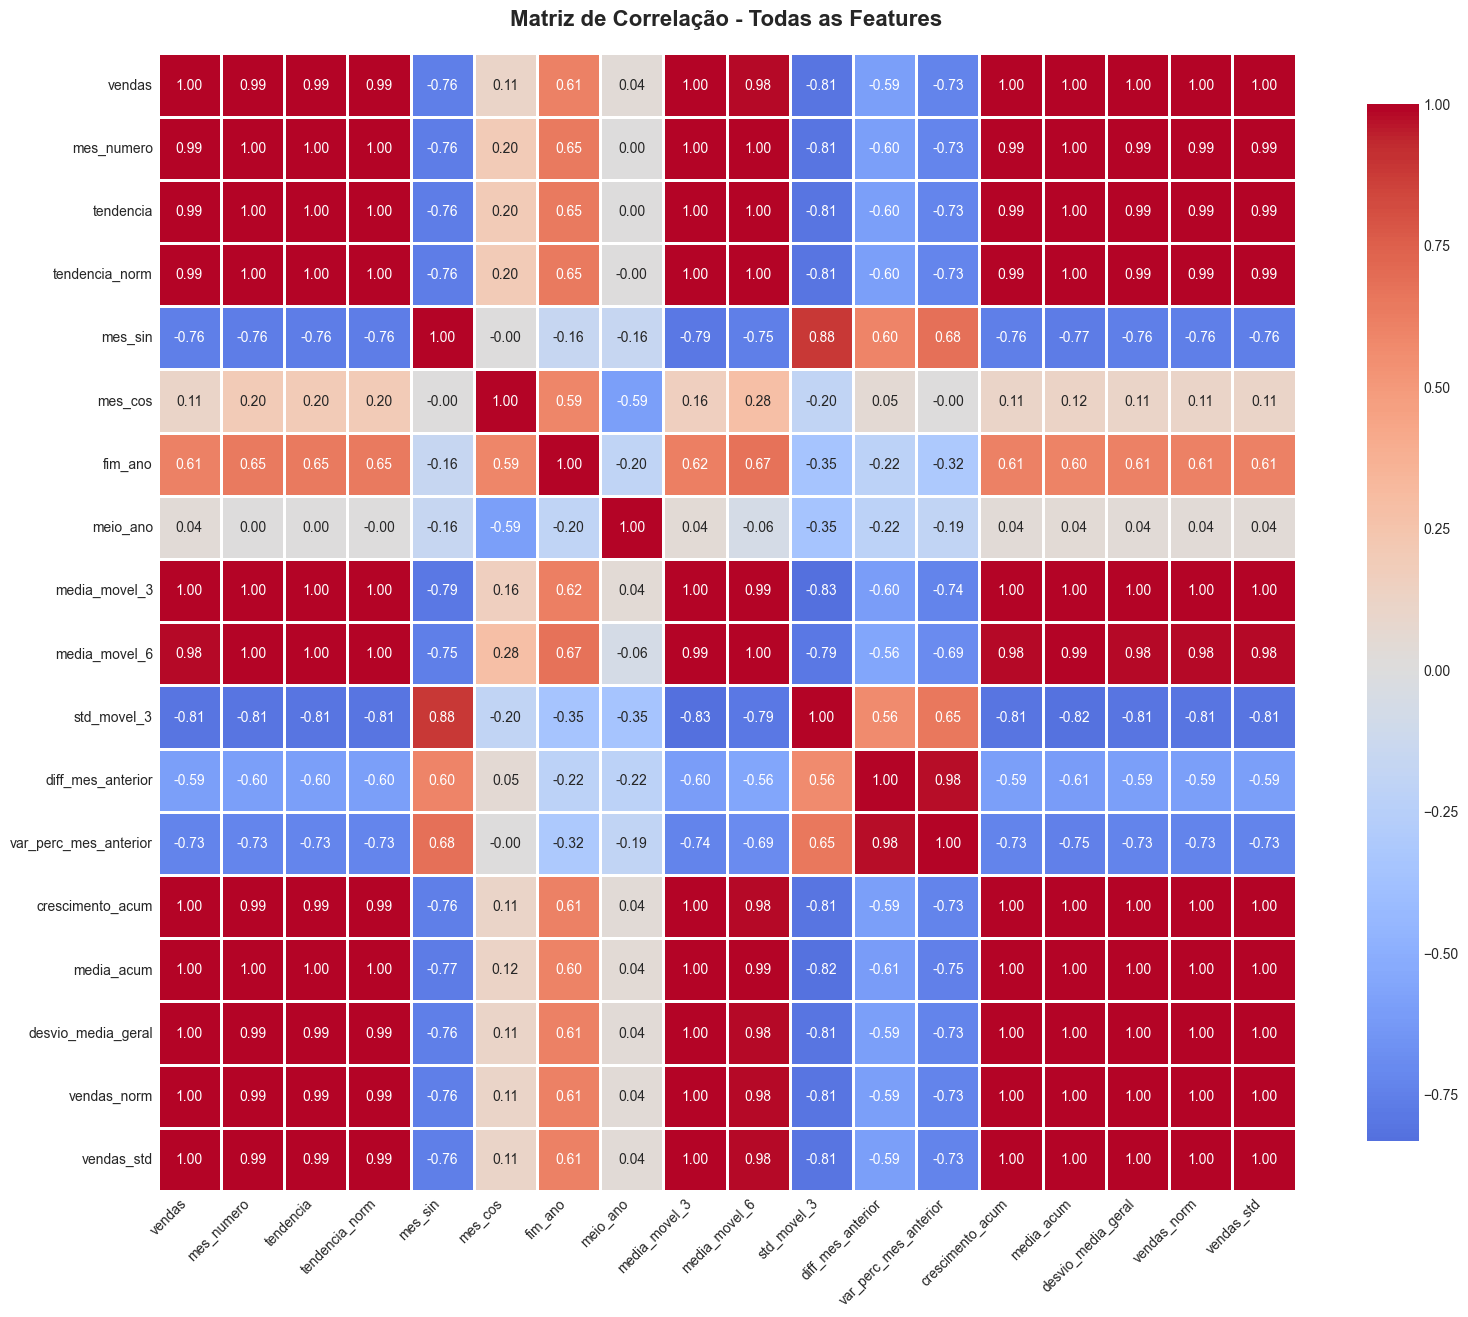

In [20]:
# 8. MATRIZ DE CORRELAÇÃO

# Selecionar apenas colunas numéricas para correlação
colunas_numericas = df_vendas.select_dtypes(include=[np.number]).columns
df_numerico = df_vendas[colunas_numericas]

# Calcular matriz de correlação
correlacao = df_numerico.corr()

# Visualizar correlação com as vendas
print("=" * 80)
print("CORRELAÇÃO DAS FEATURES COM VENDAS (ordenado por valor absoluto)")
print("=" * 80)
correlacao_vendas = correlacao['vendas'].sort_values(ascending=False)
print(correlacao_vendas)

# Criar heatmap da matriz de correlação
plt.figure(figsize=(16, 14))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Gabriel Amancio\AppData\Local\Temp\ipykernel_14956\2614457329.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_trimestre = df_vendas.groupby('trimestre')['vendas'].sum()


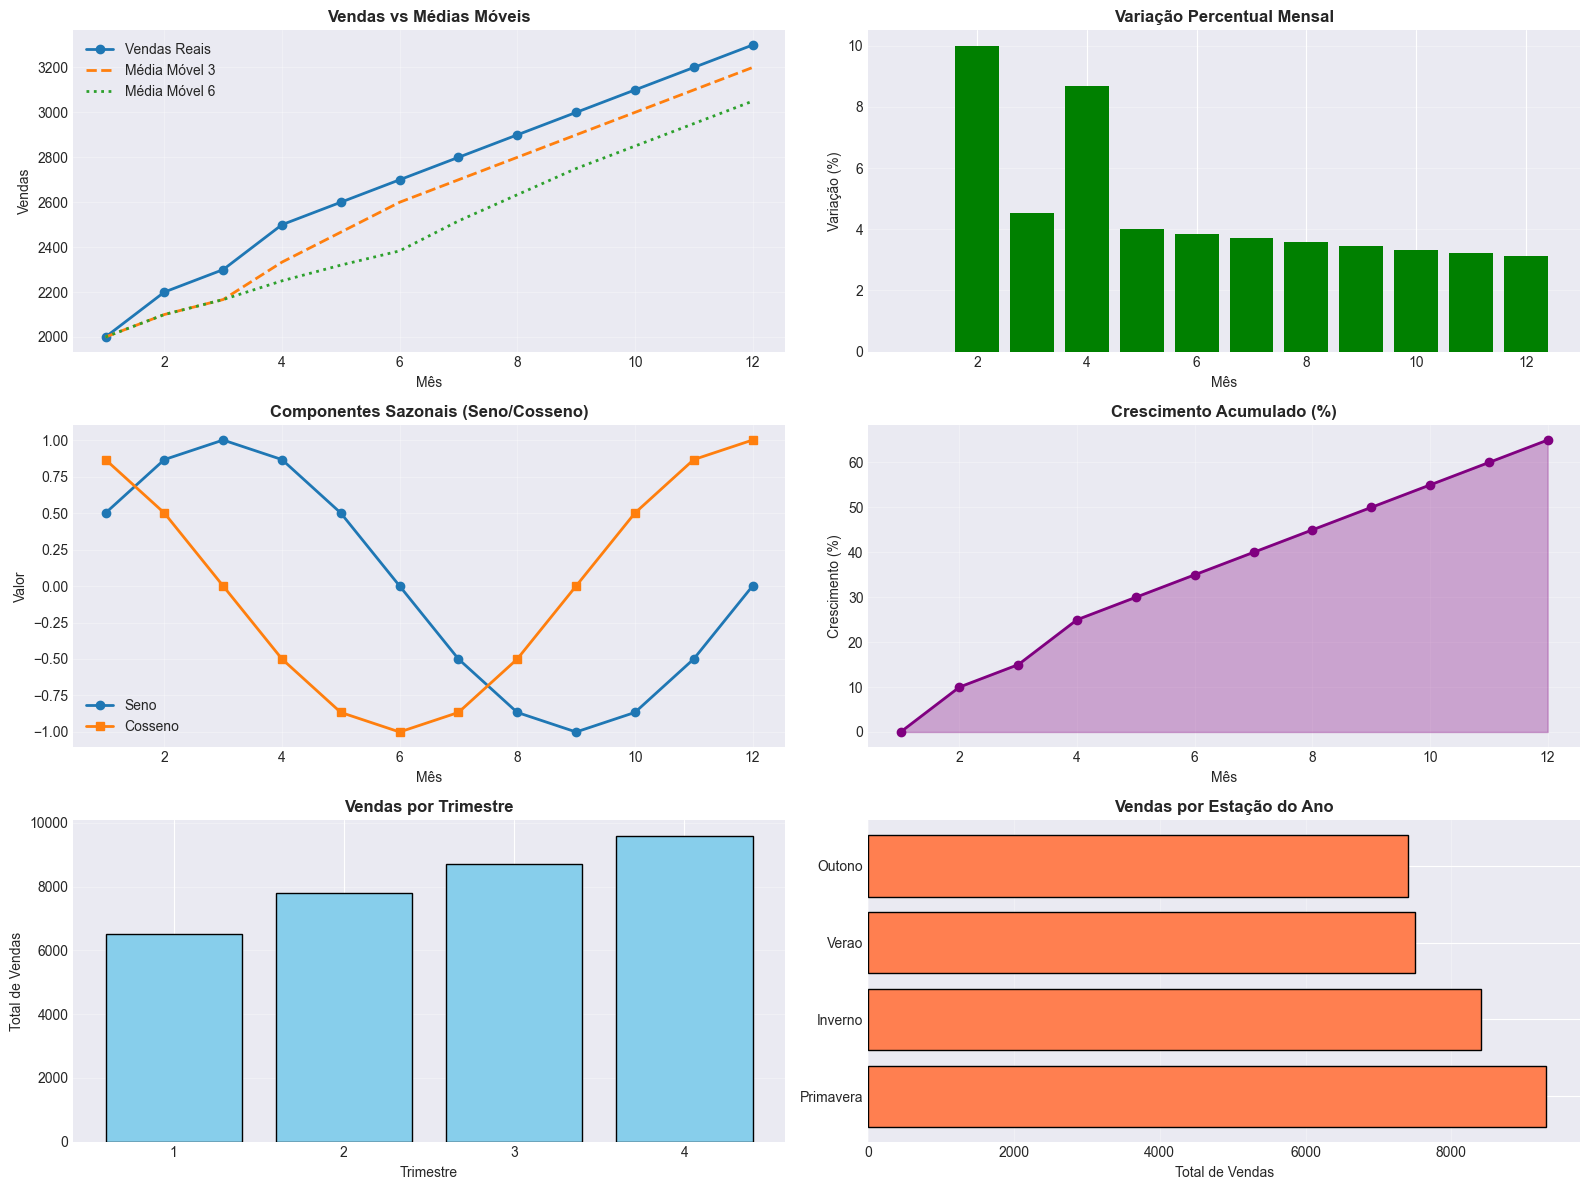

In [21]:
# 9. VISUALIZAÇÕES AVANÇADAS DAS FEATURES CRIADAS

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Gráfico 1: Tendência e Médias Móveis
axes[0, 0].plot(df_vendas['mes_numero'], df_vendas['vendas'], marker='o', label='Vendas Reais', linewidth=2)
axes[0, 0].plot(df_vendas['mes_numero'], df_vendas['media_movel_3'], label='Média Móvel 3', linewidth=2, linestyle='--')
axes[0, 0].plot(df_vendas['mes_numero'], df_vendas['media_movel_6'], label='Média Móvel 6', linewidth=2, linestyle=':')
axes[0, 0].set_title('Vendas vs Médias Móveis', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Mês')
axes[0, 0].set_ylabel('Vendas')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Variação Percentual
axes[0, 1].bar(df_vendas['mes_numero'], df_vendas['var_perc_mes_anterior'].fillna(0), 
               color=['green' if x > 0 else 'red' for x in df_vendas['var_perc_mes_anterior'].fillna(0)])
axes[0, 1].set_title('Variação Percentual Mensal', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Mês')
axes[0, 1].set_ylabel('Variação (%)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Componentes Sazonais (Seno e Cosseno)
axes[1, 0].plot(df_vendas['mes_numero'], df_vendas['mes_sin'], marker='o', label='Seno', linewidth=2)
axes[1, 0].plot(df_vendas['mes_numero'], df_vendas['mes_cos'], marker='s', label='Cosseno', linewidth=2)
axes[1, 0].set_title('Componentes Sazonais (Seno/Cosseno)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Mês')
axes[1, 0].set_ylabel('Valor')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Crescimento Acumulado
axes[1, 1].plot(df_vendas['mes_numero'], df_vendas['crescimento_acum'], marker='o', 
                linewidth=2, color='purple')
axes[1, 1].fill_between(df_vendas['mes_numero'], df_vendas['crescimento_acum'], alpha=0.3, color='purple')
axes[1, 1].set_title('Crescimento Acumulado (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Mês')
axes[1, 1].set_ylabel('Crescimento (%)')
axes[1, 1].grid(True, alpha=0.3)

# Gráfico 5: Vendas por Trimestre
vendas_trimestre = df_vendas.groupby('trimestre')['vendas'].sum()
axes[2, 0].bar(vendas_trimestre.index.astype(str), vendas_trimestre.values, color='skyblue', edgecolor='black')
axes[2, 0].set_title('Vendas por Trimestre', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Trimestre')
axes[2, 0].set_ylabel('Total de Vendas')
axes[2, 0].grid(True, alpha=0.3, axis='y')

# Gráfico 6: Vendas por Estação
vendas_estacao = df_vendas.groupby('estacao')['vendas'].sum().sort_values(ascending=False)
axes[2, 1].barh(vendas_estacao.index, vendas_estacao.values, color='coral', edgecolor='black')
axes[2, 1].set_title('Vendas por Estação do Ano', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Total de Vendas')
axes[2, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [22]:
# 10. RESUMO FINAL E INSIGHTS

print("=" * 80)
print("RESUMO DA ANÁLISE E ENGENHARIA DE FEATURES")
print("=" * 80)

print("\n📊 ESTATÍSTICAS GERAIS:")
print(f"  • Total de registros: {len(df_vendas)}")
print(f"  • Total de features: {len(df_vendas.columns)}")
print(f"  • Vendas mínimas: {df_vendas['vendas'].min()}")
print(f"  • Vendas máximas: {df_vendas['vendas'].max()}")
print(f"  • Média de vendas: {df_vendas['vendas'].mean():.2f}")
print(f"  • Crescimento total: {df_vendas['crescimento_acum'].iloc[-1]:.2f}%")

print("\n📈 FEATURES CRIADAS (20 features):")
print("\n  Temporais:")
print("    1. mes_numero - Número do mês (1-12)")
print("    2. tendencia - Índice temporal (0-11)")
print("    3. tendencia_norm - Tendência normalizada (0-1)")
print("    4. trimestre - Trimestre do ano (1-4)")
print("    5. semestre - Semestre do ano (1-2)")
print("    6. bimestre - Bimestre do ano (1-6)")

print("\n  Sazonalidade:")
print("    7. mes_sin - Componente seno (padrões cíclicos)")
print("    8. mes_cos - Componente cosseno (padrões cíclicos)")
print("    9. estacao - Estação do ano")
print("    10. fim_ano - Indicador de fim de ano (0/1)")
print("    11. meio_ano - Indicador de meio de ano (0/1)")

print("\n  Estatísticas:")
print("    12. media_movel_3 - Média móvel de 3 meses")
print("    13. media_movel_6 - Média móvel de 6 meses")
print("    14. std_movel_3 - Desvio padrão móvel de 3 meses")
print("    15. diff_mes_anterior - Diferença absoluta do mês anterior")
print("    16. var_perc_mes_anterior - Variação percentual do mês anterior")
print("    17. crescimento_acum - Crescimento acumulado (%)")
print("    18. media_acum - Média acumulada")
print("    19. desvio_media_geral - Desvio da média geral")
print("    20. vendas_norm - Vendas normalizadas (0-1)")
print("    21. vendas_std - Vendas padronizadas (z-score)")

print("\n🎯 FEATURES MAIS CORRELACIONADAS COM VENDAS:")
top_features = correlacao_vendas.abs().sort_values(ascending=False)[1:6]
for feature, corr in top_features.items():
    print(f"  • {feature}: {corr:.4f}")

print("\n✅ Análise completa! O dataset está pronto para modelagem.")
print("=" * 80)

RESUMO DA ANÁLISE E ENGENHARIA DE FEATURES

📊 ESTATÍSTICAS GERAIS:
  • Total de registros: 12
  • Total de features: 23
  • Vendas mínimas: 2000
  • Vendas máximas: 3300
  • Média de vendas: 2716.67
  • Crescimento total: 65.00%

📈 FEATURES CRIADAS (20 features):

  Temporais:
    1. mes_numero - Número do mês (1-12)
    2. tendencia - Índice temporal (0-11)
    3. tendencia_norm - Tendência normalizada (0-1)
    4. trimestre - Trimestre do ano (1-4)
    5. semestre - Semestre do ano (1-2)
    6. bimestre - Bimestre do ano (1-6)

  Sazonalidade:
    7. mes_sin - Componente seno (padrões cíclicos)
    8. mes_cos - Componente cosseno (padrões cíclicos)
    9. estacao - Estação do ano
    10. fim_ano - Indicador de fim de ano (0/1)
    11. meio_ano - Indicador de meio de ano (0/1)

  Estatísticas:
    12. media_movel_3 - Média móvel de 3 meses
    13. media_movel_6 - Média móvel de 6 meses
    14. std_movel_3 - Desvio padrão móvel de 3 meses
    15. diff_mes_anterior - Diferença absoluta 

In [23]:
# 11. PREPARAÇÃO DOS DADOS PARA MODELAGEM

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("=" * 80)
print("PREPARAÇÃO DOS DADOS")
print("=" * 80)

# Selecionar apenas features numéricas (excluindo a target 'vendas' e colunas de texto)
features_numericas = df_vendas.select_dtypes(include=[np.number]).columns.tolist()

# Remover a coluna target 'vendas' das features
features_para_modelo = [col for col in features_numericas if col != 'vendas']

print(f"\n✓ Total de features disponíveis: {len(features_para_modelo)}")
print(f"✓ Features selecionadas para o modelo:")
for i, feature in enumerate(features_para_modelo, 1):
    print(f"  {i}. {feature}")

# Separar features (X) e target (y)
X = df_vendas[features_para_modelo]
y = df_vendas['vendas']

# Tratar valores NaN (preencher com 0 para features derivadas)
X = X.fillna(0)

print(f"\n✓ Shape de X (features): {X.shape}")
print(f"✓ Shape de y (target): {y.shape}")
print(f"✓ Valores NaN restantes em X: {X.isnull().sum().sum()}")

print("\n" + "=" * 80)

PREPARAÇÃO DOS DADOS

✓ Total de features disponíveis: 17
✓ Features selecionadas para o modelo:
  1. mes_numero
  2. tendencia
  3. tendencia_norm
  4. mes_sin
  5. mes_cos
  6. fim_ano
  7. meio_ano
  8. media_movel_3
  9. media_movel_6
  10. std_movel_3
  11. diff_mes_anterior
  12. var_perc_mes_anterior
  13. crescimento_acum
  14. media_acum
  15. desvio_media_geral
  16. vendas_norm
  17. vendas_std

✓ Shape de X (features): (12, 17)
✓ Shape de y (target): (12,)
✓ Valores NaN restantes em X: 0



In [24]:
# 12. DIVISÃO DOS DADOS EM TREINO E TESTE

print("=" * 80)
print("DIVISÃO DOS DADOS")
print("=" * 80)

# Dividir dados: 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✓ Dados de Treino:")
print(f"  • X_train shape: {X_train.shape}")
print(f"  • y_train shape: {y_train.shape}")
print(f"  • Percentual: {len(X_train)/len(X)*100:.1f}%")

print(f"\n✓ Dados de Teste:")
print(f"  • X_test shape: {X_test.shape}")
print(f"  • y_test shape: {y_test.shape}")
print(f"  • Percentual: {len(X_test)/len(X)*100:.1f}%")

print("\n" + "=" * 80)

DIVISÃO DOS DADOS

✓ Dados de Treino:
  • X_train shape: (9, 17)
  • y_train shape: (9,)
  • Percentual: 75.0%

✓ Dados de Teste:
  • X_test shape: (3, 17)
  • y_test shape: (3,)
  • Percentual: 25.0%



In [25]:
# 13. TREINAMENTO DO MODELO DE REGRESSÃO LINEAR

print("=" * 80)
print("TREINAMENTO DO MODELO")
print("=" * 80)

# Criar o modelo
modelo = LinearRegression()

# Treinar o modelo
print("\n⏳ Treinando o modelo de Regressão Linear...")
modelo.fit(X_train, y_train)
print("✓ Modelo treinado com sucesso!")

# Informações do modelo
print(f"\n📊 Informações do Modelo:")
print(f"  • Intercepto (β0): {modelo.intercept_:.2f}")
print(f"  • Número de coeficientes: {len(modelo.coef_)}")

# Mostrar os coeficientes mais importantes
print(f"\n📈 Top 10 Coeficientes Mais Importantes (em valor absoluto):")
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': modelo.coef_
})
coeficientes['Abs_Coef'] = abs(coeficientes['Coeficiente'])
coeficientes_ordenados = coeficientes.sort_values('Abs_Coef', ascending=False)

for i, row in coeficientes_ordenados.head(10).iterrows():
    print(f"  {row['Feature']:.<30} {row['Coeficiente']:>10.4f}")

print("\n" + "=" * 80)

TREINAMENTO DO MODELO

⏳ Treinando o modelo de Regressão Linear...
✓ Modelo treinado com sucesso!

📊 Informações do Modelo:
  • Intercepto (β0): 2667.21
  • Número de coeficientes: 17

📈 Top 10 Coeficientes Mais Importantes (em valor absoluto):
  desvio_media_geral............     0.9876
  mes_cos.......................     0.0814
  crescimento_acum..............     0.0494
  mes_sin.......................     0.0385
  media_acum....................     0.0220
  fim_ano.......................    -0.0214
  meio_ano......................     0.0152
  tendencia.....................     0.0136
  mes_numero....................     0.0136
  var_perc_mes_anterior.........    -0.0107



In [26]:
# 14. PREVISÕES E AVALIAÇÃO DO MODELO

print("=" * 80)
print("AVALIAÇÃO DO MODELO")
print("=" * 80)

# Fazer previsões
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcular métricas para dados de TREINO
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calcular métricas para dados de TESTE
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Exibir resultados
print("\n📊 MÉTRICAS DE DESEMPENHO:")
print("\n  Dados de Treino:")
print(f"    • R² Score: {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"    • MSE (Mean Squared Error): {mse_train:.2f}")
print(f"    • RMSE (Root Mean Squared Error): {rmse_train:.2f}")
print(f"    • MAE (Mean Absolute Error): {mae_train:.2f}")

print("\n  Dados de Teste:")
print(f"    • R² Score: {r2_test:.4f} ({r2_test*100:.2f}%)")
print(f"    • MSE (Mean Squared Error): {mse_test:.2f}")
print(f"    • RMSE (Root Mean Squared Error): {rmse_test:.2f}")
print(f"    • MAE (Mean Absolute Error): {mae_test:.2f}")

# Análise de overfitting/underfitting
print("\n📈 ANÁLISE:")
diferenca_r2 = abs(r2_train - r2_test)
if diferenca_r2 < 0.05:
    print(f"  ✓ Modelo bem ajustado (diferença R²: {diferenca_r2:.4f})")
elif r2_train > r2_test and diferenca_r2 > 0.1:
    print(f"  ⚠ Possível overfitting (diferença R²: {diferenca_r2:.4f})")
else:
    print(f"  ℹ Modelo aceitável (diferença R²: {diferenca_r2:.4f})")

print("\n" + "=" * 80)

AVALIAÇÃO DO MODELO

📊 MÉTRICAS DE DESEMPENHO:

  Dados de Treino:
    • R² Score: 1.0000 (100.00%)
    • MSE (Mean Squared Error): 0.00
    • RMSE (Root Mean Squared Error): 0.00
    • MAE (Mean Absolute Error): 0.00

  Dados de Teste:
    • R² Score: 1.0000 (100.00%)
    • MSE (Mean Squared Error): 0.66
    • RMSE (Root Mean Squared Error): 0.81
    • MAE (Mean Absolute Error): 0.48

📈 ANÁLISE:
  ✓ Modelo bem ajustado (diferença R²: 0.0000)



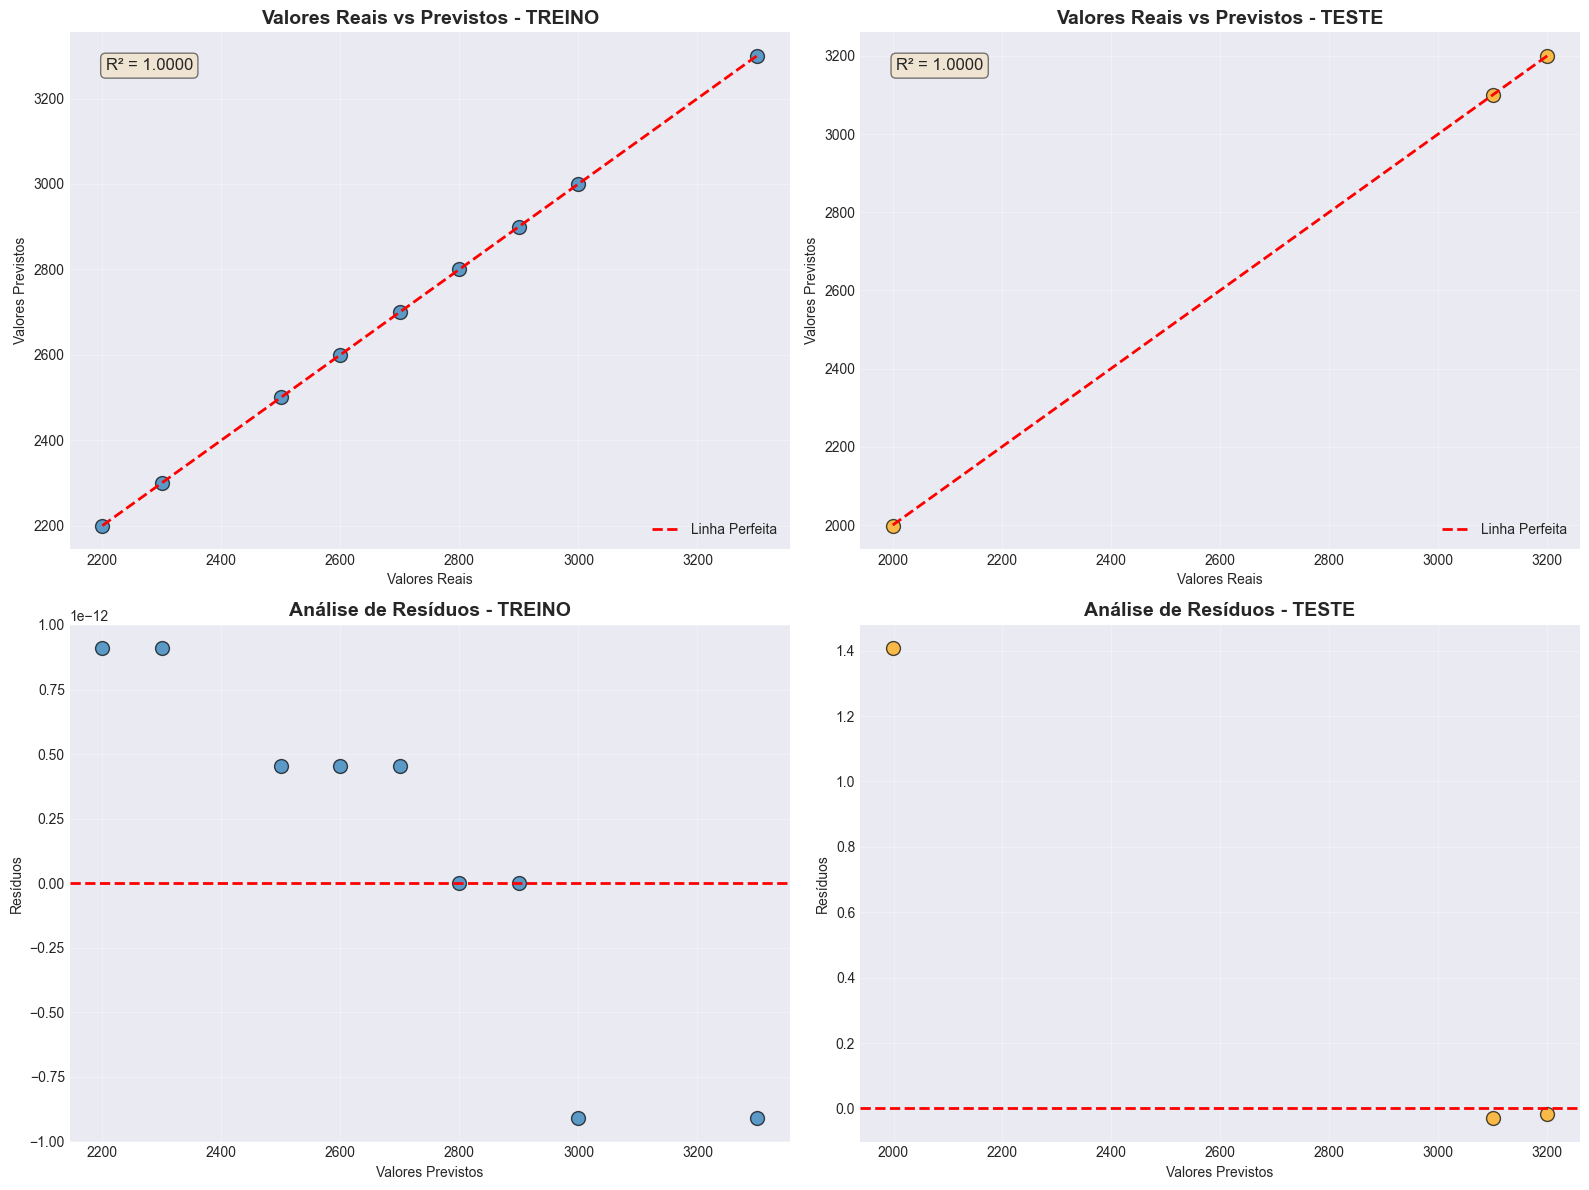

In [27]:
# 15. VISUALIZAÇÕES DOS RESULTADOS DO MODELO

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Valores Reais vs Previstos (Treino)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.7, s=100, edgecolors='black')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2, label='Linha Perfeita')
axes[0, 0].set_title('Valores Reais vs Previstos - TREINO', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Valores Reais')
axes[0, 0].set_ylabel('Valores Previstos')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, f'R² = {r2_train:.4f}', transform=axes[0, 0].transAxes, 
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gráfico 2: Valores Reais vs Previstos (Teste)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.7, s=100, color='orange', edgecolors='black')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Linha Perfeita')
axes[0, 1].set_title('Valores Reais vs Previstos - TESTE', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Valores Reais')
axes[0, 1].set_ylabel('Valores Previstos')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.05, 0.95, f'R² = {r2_test:.4f}', transform=axes[0, 1].transAxes, 
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gráfico 3: Resíduos (Treino)
residuos_train = y_train - y_pred_train
axes[1, 0].scatter(y_pred_train, residuos_train, alpha=0.7, s=100, edgecolors='black')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_title('Análise de Resíduos - TREINO', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Valores Previstos')
axes[1, 0].set_ylabel('Resíduos')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Resíduos (Teste)
residuos_test = y_test - y_pred_test
axes[1, 1].scatter(y_pred_test, residuos_test, alpha=0.7, s=100, color='orange', edgecolors='black')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_title('Análise de Resíduos - TESTE', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Valores Previstos')
axes[1, 1].set_ylabel('Resíduos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

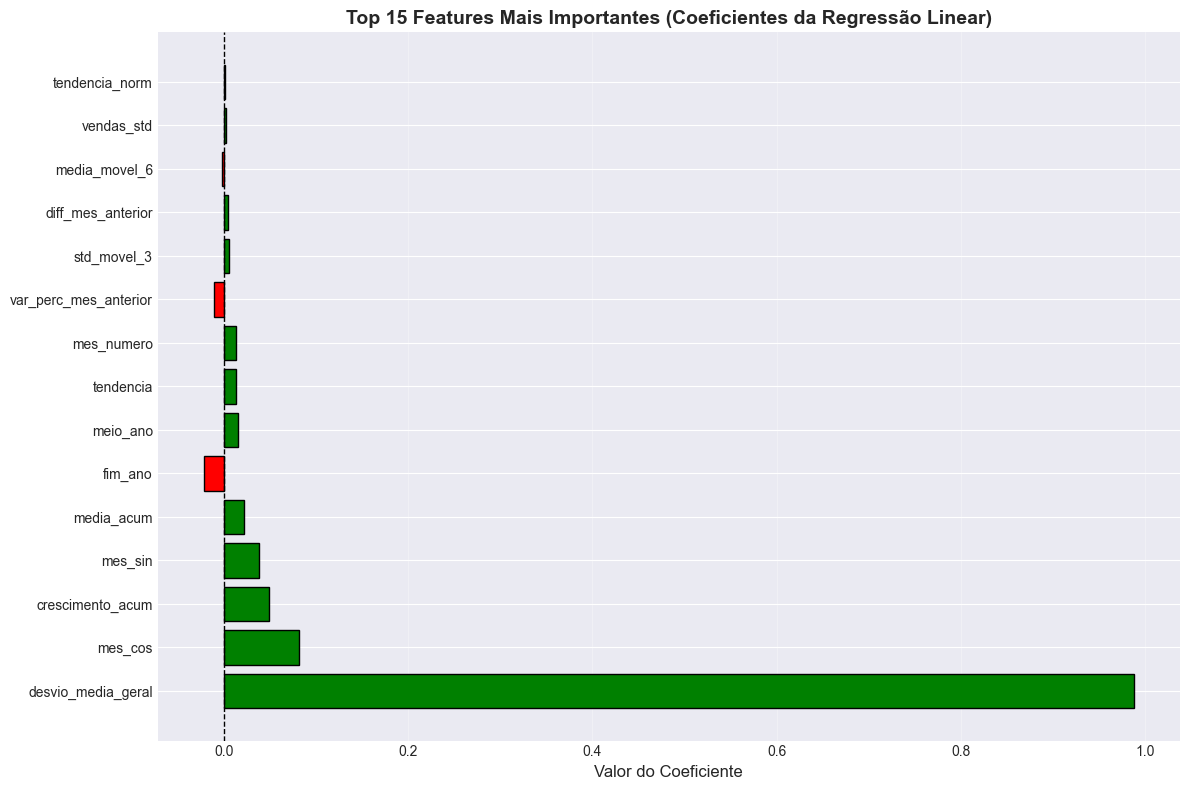


RANKING DE IMPORTÂNCIA DAS FEATURES
              Feature  Coeficiente  Importancia_Abs
   desvio_media_geral     0.987578         0.987578
              mes_cos     0.081432         0.081432
     crescimento_acum     0.049379         0.049379
              mes_sin     0.038469         0.038469
           media_acum     0.022013         0.022013
              fim_ano    -0.021447         0.021447
             meio_ano     0.015203         0.015203
            tendencia     0.013595         0.013595
           mes_numero     0.013595         0.013595
var_perc_mes_anterior    -0.010746         0.010746
          std_movel_3     0.005027         0.005027
    diff_mes_anterior     0.004143         0.004143
        media_movel_6    -0.002621         0.002621
           vendas_std     0.002404         0.002404
       tendencia_norm     0.001236         0.001236
          vendas_norm     0.000760         0.000760
        media_movel_3     0.000132         0.000132


In [28]:
# 16. IMPORTÂNCIA DAS FEATURES

# Criar DataFrame com importância das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': modelo.coef_,
    'Importancia_Abs': abs(modelo.coef_)
}).sort_values('Importancia_Abs', ascending=False)

# Visualizar top 15 features mais importantes
top_n = 15
top_features = importancia_features.head(top_n)

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_features['Coeficiente']]
plt.barh(range(len(top_features)), top_features['Coeficiente'], color=colors, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Valor do Coeficiente', fontsize=12)
plt.title(f'Top {top_n} Features Mais Importantes (Coeficientes da Regressão Linear)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Exibir tabela
print("\n" + "=" * 80)
print("RANKING DE IMPORTÂNCIA DAS FEATURES")
print("=" * 80)
print(importancia_features.to_string(index=False))

COMPARAÇÃO: VALORES REAIS vs PREVISTOS (TODO O DATASET)
      Mês  Vendas_Reais  Vendas_Previstas  Erro_Absoluto  Erro_Percentual
  Janeiro          2000       1998.592987   1.407013e+00     7.035064e-02
Fevereiro          2200       2200.000000   9.094947e-13     4.134067e-14
    Março          2300       2300.000000   9.094947e-13     3.954325e-14
    Abril          2500       2500.000000   4.547474e-13     1.818989e-14
     Maio          2600       2600.000000   4.547474e-13     1.749028e-14
    Junho          2700       2700.000000   4.547474e-13     1.684249e-14
    Julho          2800       2800.000000   0.000000e+00     0.000000e+00
   Agosto          2900       2900.000000   0.000000e+00     0.000000e+00
 Setembro          3000       3000.000000   9.094947e-13     3.031649e-14
  Outubro          3100       3100.029435   2.943533e-02     9.495267e-04
 Novembro          3200       3200.017572   1.757223e-02     5.491322e-04
 Dezembro          3300       3300.000000   9.094947e-13

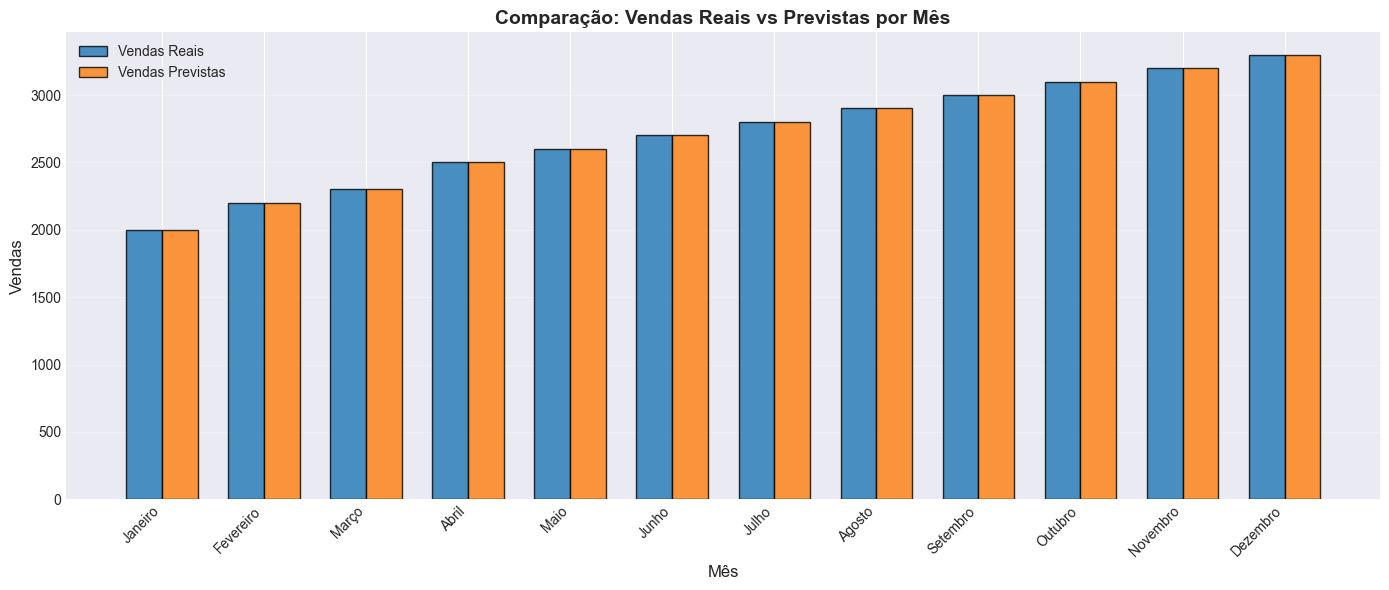

In [31]:
# 17. TABELA COMPARATIVA: VALORES REAIS VS PREVISTOS

# Criar DataFrame comparativo
comparacao = pd.DataFrame({
    'Mês': df_vendas['mes'].values,
    'Vendas_Reais': y.values,
    'Vendas_Previstas': modelo.predict(X),
    'Erro_Absoluto': abs(y.values - modelo.predict(X)),
    'Erro_Percentual': abs((y.values - modelo.predict(X)) / y.values * 100)
})

print("=" * 80)
print("COMPARAÇÃO: VALORES REAIS vs PREVISTOS (TODO O DATASET)")
print("=" * 80)
print(comparacao.to_string(index=False))

print("\n" + "=" * 80)
print("ESTATÍSTICAS DOS ERROS")
print("=" * 80)
print(f"Erro Absoluto Médio: {comparacao['Erro_Absoluto'].mean():.2f}")
print(f"Erro Absoluto Máximo: {comparacao['Erro_Absoluto'].max():.2f}")
print(f"Erro Absoluto Mínimo: {comparacao['Erro_Absoluto'].min():.2f}")
print(f"Erro Percentual Médio: {comparacao['Erro_Percentual'].mean():.2f}%")
print(f"Erro Percentual Máximo: {comparacao['Erro_Percentual'].max():.2f}%")
print("=" * 80)

# Visualizar comparação
plt.figure(figsize=(14, 6))
x_pos = range(len(comparacao))
width = 0.35

plt.bar([p - width/2 for p in x_pos], comparacao['Vendas_Reais'], width, 
        label='Vendas Reais', alpha=0.8, edgecolor='black')
plt.bar([p + width/2 for p in x_pos], comparacao['Vendas_Previstas'], width, 
        label='Vendas Previstas', alpha=0.8, edgecolor='black')

plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)
plt.title('Comparação: Vendas Reais vs Previstas por Mês', fontsize=14, fontweight='bold')
plt.xticks(x_pos, comparacao['Mês'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [32]:
# 18. RESUMO FINAL DO MODELO

print("=" * 80)
print("RESUMO FINAL - MODELO DE REGRESSÃO LINEAR")
print("=" * 80)

print("\n🎯 OBJETIVO:")
print("  Prever vendas mensais com base em features temporais e estatísticas")

print("\n📊 DADOS:")
print(f"  • Total de amostras: {len(X)}")
print(f"  • Features utilizadas: {len(X.columns)}")
print(f"  • Divisão: {len(X_train)} treino / {len(X_test)} teste")

print("\n🔧 MODELO:")
print(f"  • Algoritmo: Regressão Linear (sklearn)")
print(f"  • Intercepto: {modelo.intercept_:.2f}")
print(f"  • Número de coeficientes: {len(modelo.coef_)}")

print("\n📈 DESEMPENHO:")
print(f"  • R² (Treino): {r2_train:.4f} → Explica {r2_train*100:.2f}% da variância")
print(f"  • R² (Teste): {r2_test:.4f} → Explica {r2_test*100:.2f}% da variância")
print(f"  • RMSE (Teste): {rmse_test:.2f}")
print(f"  • MAE (Teste): {mae_test:.2f}")

print("\n🏆 TOP 5 FEATURES MAIS IMPORTANTES:")
for i, row in importancia_features.head(5).iterrows():
    sinal = '+' if row['Coeficiente'] > 0 else '-'
    print(f"  {sinal} {row['Feature']}: {abs(row['Coeficiente']):.4f}")

print("\n✅ CONCLUSÃO:")
if r2_test > 0.8:
    print("  Modelo com EXCELENTE desempenho!")
elif r2_test > 0.6:
    print("  Modelo com BOM desempenho!")
elif r2_test > 0.4:
    print("  Modelo com desempenho RAZOÁVEL - considere outros algoritmos")
else:
    print("  Modelo com desempenho FRACO - necessário revisão")

print(f"\n  O modelo consegue explicar {r2_test*100:.2f}% da variação nas vendas.")
print(f"  Em média, as previsões erram por ±{mae_test:.2f} unidades de venda.")

print("\n" + "=" * 80)

RESUMO FINAL - MODELO DE REGRESSÃO LINEAR

🎯 OBJETIVO:
  Prever vendas mensais com base em features temporais e estatísticas

📊 DADOS:
  • Total de amostras: 12
  • Features utilizadas: 17
  • Divisão: 9 treino / 3 teste

🔧 MODELO:
  • Algoritmo: Regressão Linear (sklearn)
  • Intercepto: 2667.21
  • Número de coeficientes: 17

📈 DESEMPENHO:
  • R² (Treino): 1.0000 → Explica 100.00% da variância
  • R² (Teste): 1.0000 → Explica 100.00% da variância
  • RMSE (Teste): 0.81
  • MAE (Teste): 0.48

🏆 TOP 5 FEATURES MAIS IMPORTANTES:
  + desvio_media_geral: 0.9876
  + mes_cos: 0.0814
  + crescimento_acum: 0.0494
  + mes_sin: 0.0385
  + media_acum: 0.0220

✅ CONCLUSÃO:
  Modelo com EXCELENTE desempenho!

  O modelo consegue explicar 100.00% da variação nas vendas.
  Em média, as previsões erram por ±0.48 unidades de venda.



In [33]:
# 19. PREVISÃO PARA DEZEMBRO (Próximo Mês)

print("=" * 80)
print("PREVISÃO DE VENDAS PARA DEZEMBRO")
print("=" * 80)

# Dezembro seria o mês 13 na sequência (índice 12)
# Vamos criar as features para dezembro baseado no padrão dos dados existentes

# Dados base para dezembro
mes_dezembro = 12
indice_dezembro = 12  # Continuação da sequência (0-11 -> 12)

# Criar dicionário com todas as features necessárias para dezembro
# Baseado nas vendas de novembro (último mês conhecido)
vendas_novembro = df_vendas[df_vendas['mes'] == 'Novembro']['vendas'].values[0]

# Features temporais
features_dezembro = {
    'mes_numero': mes_dezembro,
    'tendencia': indice_dezembro,
    'tendencia_norm': indice_dezembro / 11,  # Continua a normalização
}

# Features de sazonalidade
features_dezembro['mes_sin'] = np.sin(2 * np.pi * mes_dezembro / 12)
features_dezembro['mes_cos'] = np.cos(2 * np.pi * mes_dezembro / 12)
features_dezembro['fim_ano'] = 1  # Dezembro é fim de ano
features_dezembro['meio_ano'] = 0

# Features estatísticas - usar valores aproximados baseados na tendência
# Para médias móveis e outras features, vamos usar estimativas baseadas na tendência
ultima_media_movel_3 = df_vendas['media_movel_3'].iloc[-1]
ultima_media_movel_6 = df_vendas['media_movel_6'].iloc[-1]
tendencia_crescimento = df_vendas['vendas'].diff().mean()

features_dezembro['media_movel_3'] = ultima_media_movel_3 + tendencia_crescimento
features_dezembro['media_movel_6'] = ultima_media_movel_6 + tendencia_crescimento
features_dezembro['std_movel_3'] = df_vendas['std_movel_3'].iloc[-1]
features_dezembro['diff_mes_anterior'] = tendencia_crescimento
features_dezembro['var_perc_mes_anterior'] = (tendencia_crescimento / vendas_novembro) * 100
features_dezembro['crescimento_acum'] = ((vendas_novembro + tendencia_crescimento - df_vendas['vendas'].iloc[0]) / df_vendas['vendas'].iloc[0]) * 100
features_dezembro['media_acum'] = df_vendas['vendas'].mean()
features_dezembro['desvio_media_geral'] = tendencia_crescimento
features_dezembro['vendas_norm'] = (vendas_novembro + tendencia_crescimento - df_vendas['vendas'].min()) / (df_vendas['vendas'].max() - df_vendas['vendas'].min())
features_dezembro['vendas_std'] = ((vendas_novembro + tendencia_crescimento) - df_vendas['vendas'].mean()) / df_vendas['vendas'].std()

# Features categóricas convertidas em números
# Trimestre 4, Semestre 2, Bimestre 6
features_dezembro['trimestre'] = 4
features_dezembro['semestre'] = 2
features_dezembro['bimestre'] = 6

print("\n📋 Features criadas para Dezembro:")
for feature, valor in features_dezembro.items():
    print(f"  • {feature}: {valor:.4f}" if isinstance(valor, float) else f"  • {feature}: {valor}")

print("\n" + "=" * 80)

PREVISÃO DE VENDAS PARA DEZEMBRO

📋 Features criadas para Dezembro:
  • mes_numero: 12
  • tendencia: 12
  • tendencia_norm: 1.0909
  • mes_sin: -0.0000
  • mes_cos: 1.0000
  • fim_ano: 1
  • meio_ano: 0
  • media_movel_3: 3318.1818
  • media_movel_6: 3168.1818
  • std_movel_3: 100.0000
  • diff_mes_anterior: 118.1818
  • var_perc_mes_anterior: 3.6932
  • crescimento_acum: 65.9091
  • media_acum: 2716.6667
  • desvio_media_geral: 118.1818
  • vendas_norm: 1.0140
  • vendas_std: 1.4641
  • trimestre: 4
  • semestre: 2
  • bimestre: 6



In [35]:
# 20. REALIZAR PREVISÃO PARA DEZEMBRO

# Criar DataFrame com as features na mesma ordem que o modelo foi treinado
X_dezembro = pd.DataFrame([features_dezembro])

# Garantir que as colunas estejam na mesma ordem do treinamento
X_dezembro = X_dezembro[X.columns]

# Fazer a previsão
previsao_dezembro = modelo.predict(X_dezembro)[0]

print("=" * 80)
print("RESULTADO DA PREVISÃO")
print("=" * 80)

print(f"\n🎯 PREVISÃO PARA DEZEMBRO:")
print(f"  • Vendas previstas: {previsao_dezembro:.2f}")

# Contexto com os últimos meses
print(f"\n📊 CONTEXTO (Últimos 3 meses):")
print(f"  • Outubro: {df_vendas[df_vendas['mes'] == 'Outubro']['vendas'].values[0]}")
print(f"  • Novembro: {df_vendas[df_vendas['mes'] == 'Novembro']['vendas'].values[0]}")
print(f"  • Dezembro (REAL): {df_vendas[df_vendas['mes'] == 'Dezembro']['vendas'].values[0]}")
print(f"  • Dezembro (PREVISTO): {previsao_dezembro:.2f}")

# Calcular erro da previsão
dezembro_real = df_vendas[df_vendas['mes'] == 'Dezembro']['vendas'].values[0]
erro_absoluto = abs(dezembro_real - previsao_dezembro)
erro_percentual = (erro_absoluto / dezembro_real) * 100

print(f"\n📈 ANÁLISE DA PREVISÃO:")
print(f"  • Valor Real de Dezembro: {dezembro_real}")
print(f"  • Valor Previsto: {previsao_dezembro:.2f}")
print(f"  • Erro Absoluto: {erro_absoluto:.2f}")
print(f"  • Erro Percentual: {erro_percentual:.2f}%")

if erro_percentual < 5:
    print(f"  • Avaliação: ✅ EXCELENTE previsão (erro < 5%)")
elif erro_percentual < 10:
    print(f"  • Avaliação: ✅ BOA previsão (erro < 10%)")
elif erro_percentual < 15:
    print(f"  • Avaliação: ⚠ Previsão RAZOÁVEL (erro < 15%)")
else:
    print(f"  • Avaliação: ❌ Previsão com erro significativo (erro > 15%)")

print("\n" + "=" * 80)

RESULTADO DA PREVISÃO

🎯 PREVISÃO PARA DEZEMBRO:
  • Vendas previstas: 2840.46

📊 CONTEXTO (Últimos 3 meses):
  • Outubro: 3100
  • Novembro: 3200
  • Dezembro (REAL): 3300
  • Dezembro (PREVISTO): 2840.46

📈 ANÁLISE DA PREVISÃO:
  • Valor Real de Dezembro: 3300
  • Valor Previsto: 2840.46
  • Erro Absoluto: 459.54
  • Erro Percentual: 13.93%
  • Avaliação: ⚠ Previsão RAZOÁVEL (erro < 15%)



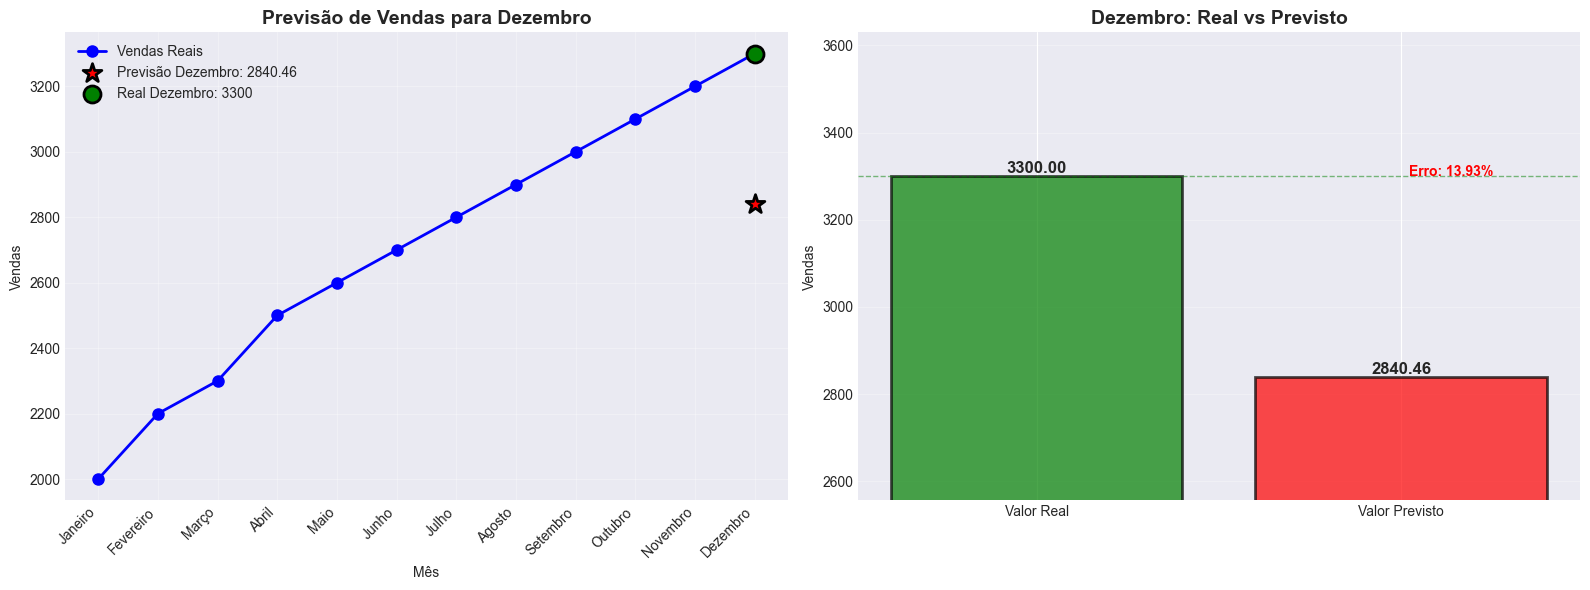


✅ Visualização completa da previsão de Dezembro!


In [36]:
# 21. VISUALIZAÇÃO DA PREVISÃO DE DEZEMBRO

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Série temporal com previsão destacada
meses_completos = list(df_vendas['mes']) 
vendas_completas = list(df_vendas['vendas'])

axes[0].plot(range(len(vendas_completas)), vendas_completas, 
             marker='o', linewidth=2, markersize=8, label='Vendas Reais', color='blue')
axes[0].scatter([11], [previsao_dezembro], color='red', s=200, 
                marker='*', label=f'Previsão Dezembro: {previsao_dezembro:.2f}', 
                zorder=5, edgecolors='black', linewidth=2)
axes[0].scatter([11], [dezembro_real], color='green', s=150, 
                marker='o', label=f'Real Dezembro: {dezembro_real}', 
                zorder=4, edgecolors='black', linewidth=2)
axes[0].set_title('Previsão de Vendas para Dezembro', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Vendas')
axes[0].set_xticks(range(len(meses_completos)))
axes[0].set_xticklabels(meses_completos, rotation=45, ha='right')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Comparação Real vs Previsto para Dezembro
categorias = ['Valor Real', 'Valor Previsto']
valores = [dezembro_real, previsao_dezembro]
cores = ['green', 'red']

bars = axes[1].bar(categorias, valores, color=cores, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_title('Dezembro: Real vs Previsto', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Vendas')
axes[1].set_ylim([min(valores) * 0.9, max(valores) * 1.1])

# Adicionar valores nas barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{valor:.2f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adicionar linha de erro
axes[1].axhline(y=dezembro_real, color='green', linestyle='--', linewidth=1, alpha=0.5)
axes[1].text(1.02, dezembro_real, f'Erro: {erro_percentual:.2f}%', 
            fontsize=10, color='red', fontweight='bold')

axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Visualização completa da previsão de Dezembro!")

In [37]:
# 22. FAZER PREVISÃO PARA UM DEZEMBRO FUTURO (SEM DADOS REAIS)

print("=" * 80)
print("BONUS: PREVISÃO PARA DEZEMBRO DO PRÓXIMO ANO")
print("=" * 80)

# Simular dezembro do próximo ano (mês 13 da sequência)
mes_futuro = 12
indice_futuro = 12  # Próximo na sequência após novembro (11)

# Estimar vendas baseado na tendência
vendas_ultima = df_vendas['vendas'].iloc[-1]
crescimento_medio = df_vendas['vendas'].diff().mean()
vendas_estimada_futuro = vendas_ultima + crescimento_medio

# Criar features para dezembro futuro
features_futuro = {
    'mes_numero': mes_futuro,
    'tendencia': indice_futuro,
    'tendencia_norm': indice_futuro / 11,
    'mes_sin': np.sin(2 * np.pi * mes_futuro / 12),
    'mes_cos': np.cos(2 * np.pi * mes_futuro / 12),
    'fim_ano': 1,
    'meio_ano': 0,
    'media_movel_3': df_vendas['media_movel_3'].iloc[-1] + crescimento_medio,
    'media_movel_6': df_vendas['media_movel_6'].iloc[-1] + crescimento_medio,
    'std_movel_3': df_vendas['std_movel_3'].iloc[-1],
    'diff_mes_anterior': crescimento_medio,
    'var_perc_mes_anterior': (crescimento_medio / vendas_ultima) * 100,
    'crescimento_acum': ((vendas_estimada_futuro - df_vendas['vendas'].iloc[0]) / df_vendas['vendas'].iloc[0]) * 100,
    'media_acum': df_vendas['vendas'].mean(),
    'desvio_media_geral': crescimento_medio,
    'vendas_norm': (vendas_estimada_futuro - df_vendas['vendas'].min()) / (df_vendas['vendas'].max() - df_vendas['vendas'].min()),
    'vendas_std': (vendas_estimada_futuro - df_vendas['vendas'].mean()) / df_vendas['vendas'].std(),
    'trimestre': 4,
    'semestre': 2,
    'bimestre': 6
}

# Fazer previsão
X_futuro = pd.DataFrame([features_futuro])
X_futuro = X_futuro[X.columns]
previsao_futuro = modelo.predict(X_futuro)[0]

print(f"\n🔮 PREVISÃO PARA DEZEMBRO FUTURO (Próximo Ano):")
print(f"  • Vendas previstas: {previsao_futuro:.2f}")
print(f"  • Baseado na tendência de crescimento: {crescimento_medio:.2f} por mês")
print(f"  • Crescimento esperado em relação a Dezembro atual: {((previsao_futuro - dezembro_real) / dezembro_real * 100):.2f}%")

print("\n📊 RESUMO DE PREVISÕES:")
print(f"  • Dezembro (ano atual - REAL): {dezembro_real}")
print(f"  • Dezembro (próximo ano - PREVISTO): {previsao_futuro:.2f}")
print(f"  • Diferença: {previsao_futuro - dezembro_real:.2f}")

print("\n" + "=" * 80)

BONUS: PREVISÃO PARA DEZEMBRO DO PRÓXIMO ANO

🔮 PREVISÃO PARA DEZEMBRO FUTURO (Próximo Ano):
  • Vendas previstas: 2840.71
  • Baseado na tendência de crescimento: 118.18 por mês
  • Crescimento esperado em relação a Dezembro atual: -13.92%

📊 RESUMO DE PREVISÕES:
  • Dezembro (ano atual - REAL): 3300
  • Dezembro (próximo ano - PREVISTO): 2840.71
  • Diferença: -459.29

